In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Классификация

In [14]:
df_heart = pd.read_csv('heart.csv')

df_heart = df_heart.copy()

y_cls = df_heart['target']
X_cls = df_heart.drop('target', axis=1)

Гипотеза 1 - классы сбалансированы

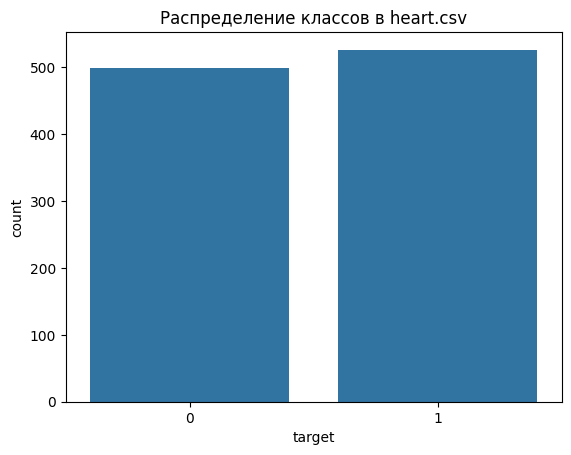

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [10]:
sns.countplot(x='target', data=df_heart)
plt.title('Распределение классов в heart.csv')
plt.show()

print(df_heart['target'].value_counts(normalize=True))

Гипотеза 2 - признаки могут иметь разные распределения для классов

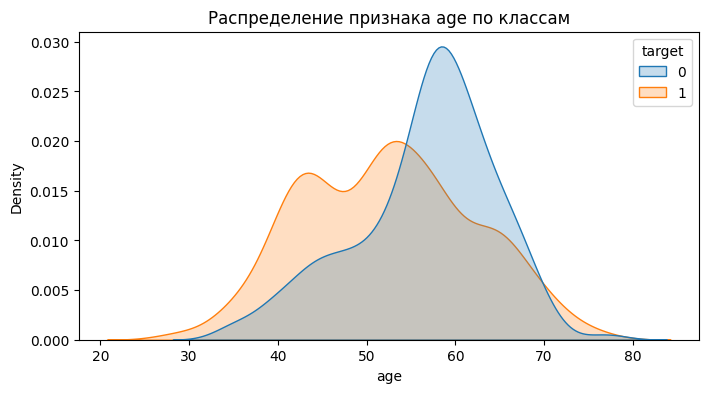

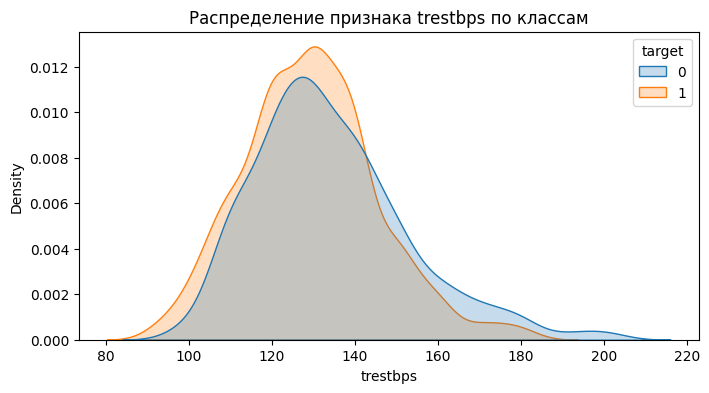

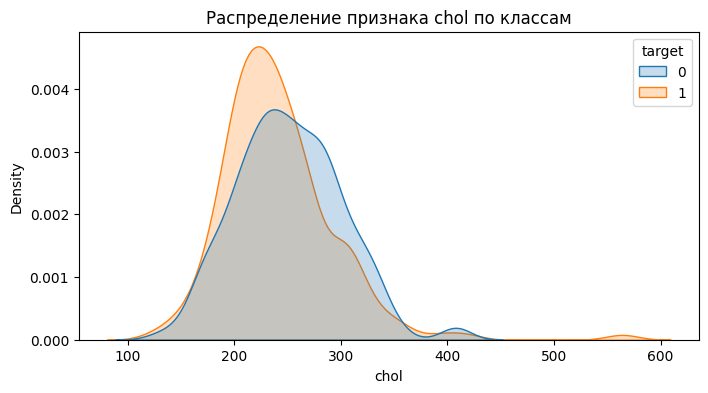

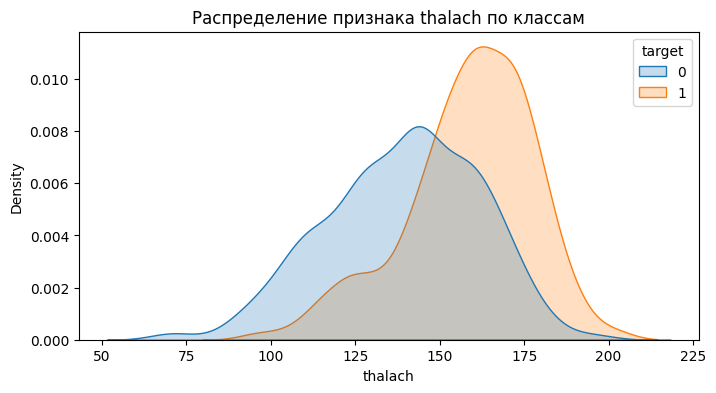

In [11]:
features_cls = ['age', 'trestbps', 'chol', 'thalach']

for feat in features_cls:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df_heart, x=feat, hue='target', fill=True)
    plt.title(f'Распределение признака {feat} по классам')
    plt.show()


Гипотеза 3 - корреляции могут подсказать важные признаки

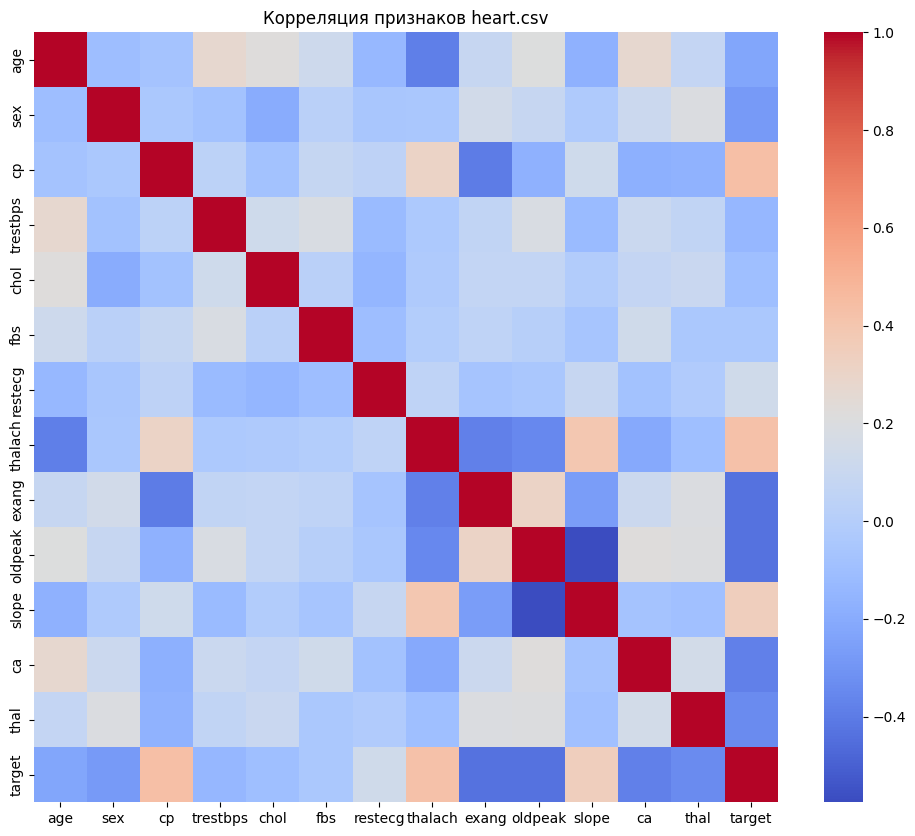

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart.corr(), cmap='coolwarm', annot=False)
plt.title('Корреляция признаков heart.csv')
plt.show()

Гипотеза 4 - значения некоторых признаков могут быть неоднородны

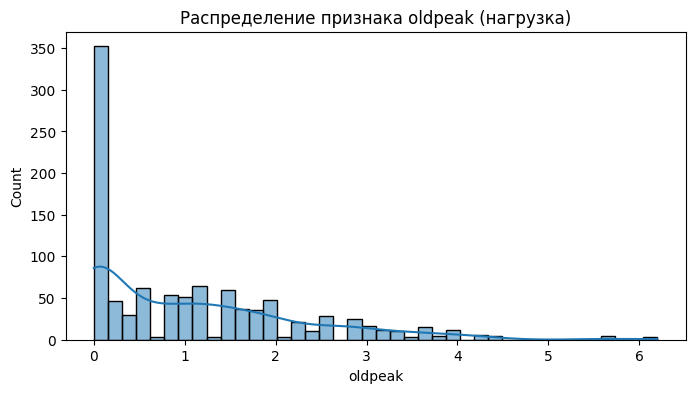

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df_heart['oldpeak'], bins=40, kde=True)
plt.title('Распределение признака oldpeak (нагрузка)')
plt.show()

Регрессия

In [15]:
df_energy = pd.read_csv('energy_efficiency_data.csv')

df_energy = df_energy.copy()

y_reg = df_energy['Heating_Load']
X_reg = df_energy.drop(['Heating_Load', 'Cooling_Load'], axis=1)

Гипотеза 1 - распределние целевой переменной Heating_Load

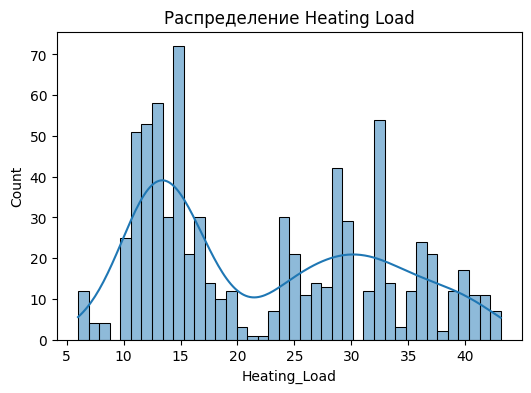

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df_energy['Heating_Load'], bins=40, kde=True)
plt.title("Распределение Heating Load")
plt.show()

Гипотеза 2 - числовые признаки могут быть коррелированы

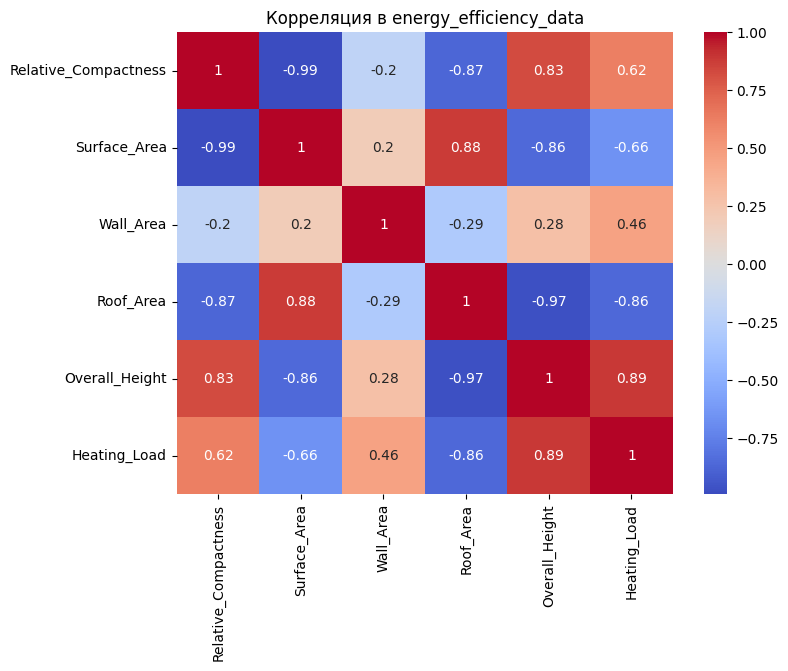

In [17]:
numeric_cols_reg = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 
                    'Roof_Area', 'Overall_Height']

plt.figure(figsize=(8,6))
sns.heatmap(df_energy[numeric_cols_reg + ['Heating_Load']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Корреляция в energy_efficiency_data")
plt.show()

Гипотеза 3 - визуальный осмотр взаимосвязей признаков

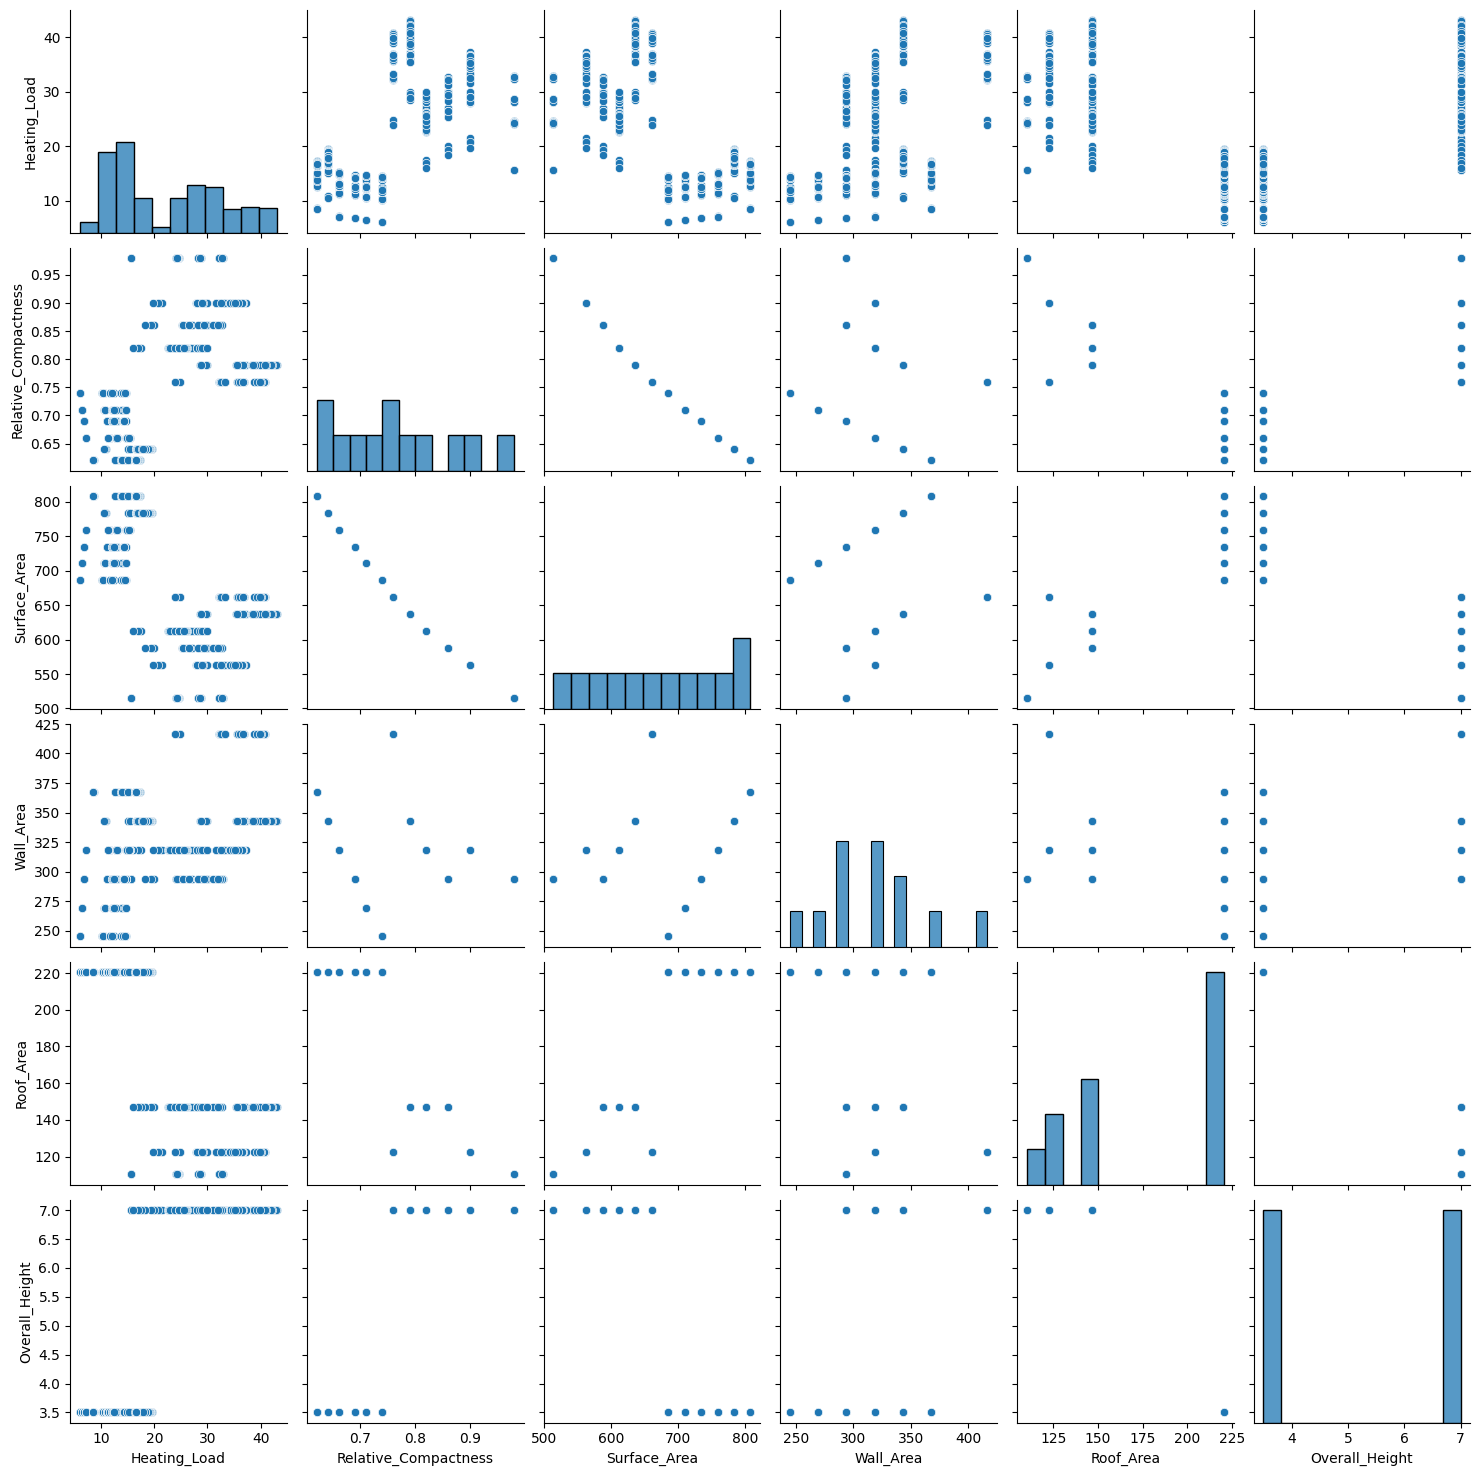

In [18]:
sns.pairplot(df_energy[['Heating_Load'] + numeric_cols_reg])
plt.show()